## Part 1: Dealing with Class Imbalance (2 parts total)

<hr style="border:6px solid gray"> </hr>

### SMOTE: Synthetic Minority Oversampling Technique

Our first example shows how we can use SMOTE on a un-balanced dataset to generate a new re-balanced dataset.

### Alert:
1. This can be slow when data is large.
1. It can work on binary or multiclass classification data.

### Imbalanced Learn Library
See [Imbalanced-Learn documentation](https://imbalanced-learn.org/stable/).

In [ ]:
# Uncomment the following line to install Imbalanced learn
#!pip install imblearn

In [2]:
from sklearn.datasets import make_classification
import numpy as np
import warnings

from collections import Counter
from imblearn.over_sampling import SMOTE 

import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

We use the following code snippet to generate a classification dataset with an imbalanced target, where the degree of imbalance is set by the `weights` argument below.

In [3]:
%%time
sample_size = 1000
X, y = make_classification(n_classes=3,
                           class_sep=2,
                           weights=[0.05, 0.1, 0.85],
                           n_samples=sample_size,
                           n_features=2,
                           n_redundant=0,
                           n_informative=2,
                           random_state=10,
                           n_clusters_per_class=1)
print('Original dataset shape {}'.format(Counter(y)))

Original dataset shape Counter({2: 848, 1: 99, 0: 53})
CPU times: user 2.14 ms, sys: 1.38 ms, total: 3.52 ms
Wall time: 2.28 ms


We can also use `np.unique` to get counts for each class.

In [4]:
np.unique(y, return_counts = True)

(array([0, 1, 2]), array([ 53,  99, 848]))

<hr style="border:2px solid gray"> </hr>

## Plot Samples

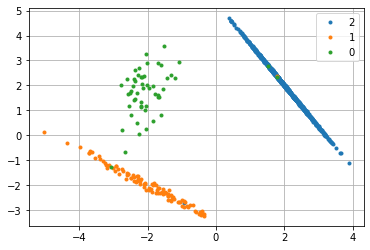

In [5]:
fig, ax = plt.subplots()

for y_cat in [2, 1, 0]:
    row_ix = np.where(y==y_cat)[0]
    ax.plot(X[row_ix, 0], X[row_ix, 1], marker='.', linestyle='', label=y_cat)
ax.legend()
ax.grid()
plt.show()

<hr style="border:2px solid gray"> </hr>

## Strategy: Random Over Sampling

Here we just randomly sample lower represented classes WITH replacement. This means that lower count categories have repeated observations.

In [6]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_ros, y_ros = ros.fit_resample(X, y)

# Print out new counter of classes:
print('Resampled dataset shape {}'.format(Counter(y_ros)))

Resampled dataset shape Counter({2: 848, 1: 848, 0: 848})


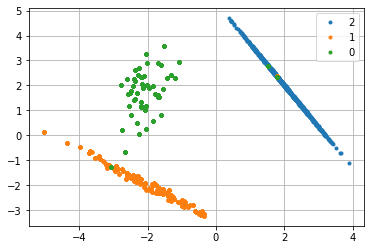

In [7]:
fig, ax = plt.subplots()

for y_cat in [2, 1, 0]:
    row_ix = np.where(y_ros==y_cat)[0]
    ax.plot(X_ros[row_ix, 0], X_ros[row_ix, 1], marker='.', linestyle='', label=y_cat)
ax.legend()
ax.grid()
plt.show()

Honestly, the graphs look the same, except 2 of the classes have more thickness to the points.

<hr style="border:2px solid gray"> </hr>

## Strategy: Synthetic Minority Oversampling Technique (SMOTE)

How to get *new* examples?

What if we did some "interpolation" between points in the minority classes, and picked points from there?

From the paper:

> Specifically, a random example from the minority class is first chosen. Then k of the nearest neighbors for that example are found (typically k=5). A randomly selected neighbor is chosen and a synthetic example is created at a randomly selected point between the two examples in feature space.

In [8]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
X_smote, y_smote = smote.fit_resample(X, y)

# Print out new counter of classes:
print('Resampled dataset shape {}'.format(Counter(y_smote)))

Resampled dataset shape Counter({2: 848, 1: 848, 0: 848})


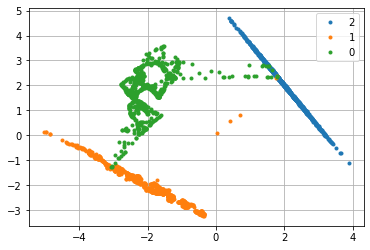

In [9]:
# Plot

fig, ax = plt.subplots()

for y_cat in [2, 1, 0]:
    row_ix = np.where(y_smote==y_cat)[0]
    ax.plot(X_smote[row_ix, 0], X_smote[row_ix, 1], marker='.', linestyle='', label=y_cat)
ax.legend()
ax.grid()

### Whoa.

Notice some erratic green and orange ones. What's happening here?

<hr style="border:2px solid gray"> </hr>


## Strategy: Adaptive Synthetic (ADASYN) Sampling

SMOTE is great, but what about points that are misclassified for underrepresented classes? Shouldn't underrepresented misclassifications be more important?

Here, we try to generate (1) observations in non-observed space, and (2) observations that have large class-overlap nearby. (Usually done via K-nearest neighbors misclassification rates).

From the paper:

> ...generate more synthetic examples in regions of the feature space where the density of minority examples is low, and fewer or none where the density is high.

In [10]:
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state=0)
X_ada, y_ada = ada.fit_resample(X, y)

# Print out new counter of classes:
print('Resampled dataset shape {}'.format(Counter(y_ada)))

Resampled dataset shape Counter({1: 856, 2: 848, 0: 847})


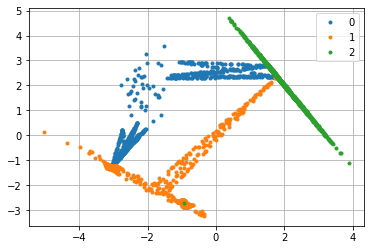

In [11]:
# Plot

fig, ax = plt.subplots()

for y_cat in [0, 1, 2]:
    row_ix = np.where(y_ada==y_cat)[0]
    ax.plot(X_ada[row_ix, 0], X_ada[row_ix, 1], marker='.', linestyle='', label=y_cat)
ax.legend()
ax.grid()
plt.show()

### Discussion.

Questions:

 1. What is the problem w/ the above ADASYN?
 
 2. Which method(s) are better for datasets with outliers?
 


<hr style="border:2px solid gray"> </hr>

### What about just downsampling class 2?

Further reading about this here:

https://imbalanced-learn.org/stable/under_sampling.html

### End of Part 1

## Part 2: Binary classification of Boston housing data

<hr style="border:6px solid gray"> </hr>

The Boston dataset has housing data including median price. We create a binary label to flag the most expensive houses and build a classifier to predict the likelihood of a house being expensive.

Data Details:
- https://scikit-learn.org/stable/datasets/index.html#boston-dataset

In [12]:
from sklearn.datasets import load_boston
import pandas as pd
import seaborn as sns
import numpy as np

In [13]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

Note that the `boston` object above is a Python dictionary, which include the features `boston['data']`, the target which is the housing price in `boston['target']`, and additional metadata, such a a description.

### Exercise

Print a description of the `boston` dataset and read what each column represents.

In [14]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### End of exercise

Let's visualize the first few rows of the `boston` data.

In [15]:
boston['data'][1:5]

array([[2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00]])

As you can see this is not very pretty. The reason is that `boston` is a Python array, similar to a matrix. Of course, at the end of the day all tabular data is turned into an array so that we can do linear algebra with it, but for the sake of visualization this is not ideal. The solution is to take the raw array and turn it into a `DataFrame` using the `pandas` library, which was created for this purpose. It allows us to interact with the data in a more code-friendly and intuitive way.

In [16]:
df_boston = pd.DataFrame(boston['data'], columns = boston['feature_names'])
df_boston.head(n=10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


So `df_boston` is a `DataFrame` that represents the `boston['data']` array. In fact, if we needed to go back to the array, we can just type `df_boston.values`, but we rarely need to do that. Using `pandas` we can visualize, process, and summarize the data in an easier way than if we had to do it using `numpy` directly. Of course, `pandas` itself usese `numpy` to do this behind the scenes, but this is mostly hidden from us. This is why we say `DataFrame` is an **abstraction layer** on top of `numpy` so data scientists can do their most common tasks without having to use `numpy` directly.

<hr style="border:2px solid gray"> </hr>

### Exercise

As one example, recall that earlier in the notebook we used `np.unique(...)` to get counts. Use it to get counts for each unique value of the `RAD` column in `df_boston`, in other words `df_boston['RAD']`.

In [17]:
np.unique(df_boston['RAD'], return_counts=True)

(array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8., 24.]),
 array([ 20,  24,  38, 110, 115,  26,  17,  24, 132]))

Now turn the counts into percentages instead.

In [18]:
cats, counts = np.unique(df_boston['RAD'], return_counts=True)

In [19]:
percents = [x/sum(counts) for x in counts]
percents

[0.039525691699604744,
 0.04743083003952569,
 0.07509881422924901,
 0.21739130434782608,
 0.22727272727272727,
 0.05138339920948617,
 0.03359683794466403,
 0.04743083003952569,
 0.2608695652173913]

Since getting counts and turning them into percentages is such a common data-related task, there's got to be an easier way to do it. And there is. Search online to see if `pandas` offers a function for getting unique counts for a column in the data. Can you turn the counts into percentages?

In [20]:
df_boston['RAD'].value_counts(sort=True)

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

### End of exercise

<hr style="border:2px solid gray"> </hr>

Let's now visualize the target variable, housing price.

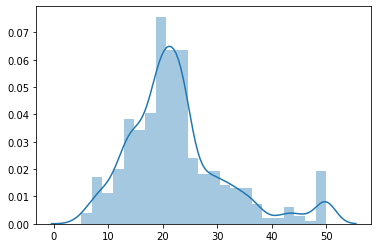

In [21]:
%matplotlib inline
ax = sns.distplot(boston['target'])

Say we're interested in training a classification algorithm to predict whether or not a house is worth 40k or more. So first we create a target column in the data that flags houses who sold for 40k or more.

In [22]:
df_boston['is_above_40k'] = boston['target'] >= 40

In [23]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,is_above_40k
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,False
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,False
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,False
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,False
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,False


We start by splitting `df_boston` into a training data and a testing data. The easiest way to do this is using the `train_test_split` function.

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_boston.drop(columns = 'is_above_40k'), 
                                                    df_boston['is_above_40k'], 
                                                    test_size = 0.20, 
                                                    random_state = 0)

<hr style="border:2px solid gray"> </hr>

### Exercise

Find counts for `is_above_40k`.

In [26]:
df_boston['is_above_40k'].value_counts(sort=True)

False    475
True      31
Name: is_above_40k, dtype: int64

Train a logistic regression classifier to predict when the price of a house is above 40k. Begin by loading the library as such: `from sklearn.linear_model import LogisticRegression`. Then create an instance of the algorithm and train it by invoking the `.fit(x_train, y_train)`.

In [27]:
from sklearn.linear_model import LogisticRegression
l_regress_model = LogisticRegression()
l_regress_model.fit(x_train, y_train)

LogisticRegression()

In [29]:
y_pred = l_regress_model.predict(x_test)
#x_train, x_test, y_train, y_test

Once the model is trained, pass it the testing data to see if we get predictions back. To do so, we invoke the `.predict(x_test)` method. We can also invoke the `.predict_proba(x_test)` method if we wish to get the raw probabilites instead of the final predictions.

In [35]:
y_test_preds = l_regress_model.predict_proba(x_test)
y_test_pred =  y_test_preds[:,1].round()

In [37]:
y_test_pred2 = l_regress_model.predict(x_test)

In [38]:
y_test_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [39]:
y_test_pred2

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

Get the accuracy of the model by loading `from sklearn.metrics import accuracy_score` and calling the `accuracy_score` function. What two arguments do we pass to this function to evaluate the model's accuracy?

In [40]:
from sklearn.metrics import accuracy_score

In [41]:
accuracy_score(y_test.astype(float), y_test_pred)

0.9607843137254902

Is accuracy a good metric for evaluating this model? Why or why not? To give some context, let's say you're a developer and want to predict house prices. You prefer to bid low and lose a bid than bid high for a house that's not worth it.

### End of exercise

<hr style="border:2px solid gray"> </hr>

Let's find some more useful evaluation metrics. The most direct metric to look at, is the confusion matrix.

In [42]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_test_pred)
print(cm)

[[95  0]
 [ 4  3]]


From the confusion matrix, we can derive accuracy, precision, recall, and the F1-score, which is a sort of average of precision and recall. We don't have time to get into all of them in detail, but [here](http://www.win-vector.com/blog/2009/11/i-dont-think-that-means-what-you-think-it-means-statistics-to-english-translation-part-1-accuracy-measures/) is an excellent article I recommend you read.

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

       False       0.96      1.00      0.98        95
        True       1.00      0.43      0.60         7

    accuracy                           0.96       102
   macro avg       0.98      0.71      0.79       102
weighted avg       0.96      0.96      0.95       102



One way to visually evaluate a binary classification model is using the ROC plot. By itself, it is not very useful, but by comparing the ROC plot of multiple models we can start seeing which models are better. The area under the ROC plot is called AUC (area under the curve) and the closer it is to 1, the better the model.

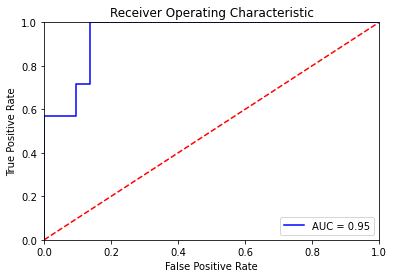

In [44]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_preds[:,1])
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<hr style="border:2px solid gray"> </hr>

### Exercise

1. The `LogisticRegression` classifier we trained above has an argument called `class_weight`. Read the documentation to see what it does, then train a new model this time by providing the class weights. 
1. Does it change any of the results? In what way?

### End of exercise

<hr style="border:2px solid gray"> </hr>

## Part 3: Cross-validation for binary classification

In the last section, we trained a logistic regression classifier on the Boston housing data. In this section, we train the same logistic regression classifier, but use cross-validation to tune it.


sklearn logistic regression cross-validation documentation:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html

In [45]:
from sklearn.linear_model import LogisticRegressionCV
# Takes about 10-15 with cv=10 seconds on my (Nick) laptop.
clr = LogisticRegressionCV(cv = 30, random_state = 13, max_iter = 1000)
clr.fit(x_train, y_train)

LogisticRegressionCV(cv=30, max_iter=1000, random_state=13)

In [46]:
predictions = clr.predict(x_train)

In [47]:
np.unique(predictions, return_counts = True)

(array([False,  True]), array([386,  18]))

In [48]:
accuracy_score(predictions, y_train)

0.9801980198019802

In [49]:
y_test_preds = clr.predict(x_test)
y_test_proba = clr.predict_proba(x_test)

In [50]:
metrics.confusion_matrix(y_test, y_test_preds)

array([[95,  0],
       [ 6,  1]])

In [51]:
accuracy_score(y_test, y_test_preds)

0.9411764705882353

In [52]:
print(classification_report(y_test, y_test_preds))

              precision    recall  f1-score   support

       False       0.94      1.00      0.97        95
        True       1.00      0.14      0.25         7

    accuracy                           0.94       102
   macro avg       0.97      0.57      0.61       102
weighted avg       0.94      0.94      0.92       102



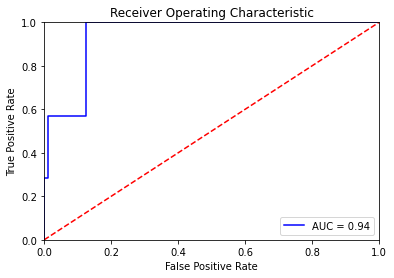

In [53]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_proba[:,1])
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<hr style="border:2px solid gray"> </hr>

### Exercise

1. Does cross-validation seem to make a difference in the results we get?
1. Change the number of folds from 5 to 30 and train the CV model again? Notice any difference in performance? Note that *performance* here refers to the model's overall accuracy, based on your choice of metric, it does NOT refer to run-time? What was the cost of increasing the number of folds?

### End of exercise